## Install and import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow==2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installati

In [ ]:
pip install textaugment

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15717 sha256=1b2778ea0ebbf00fe78066a9322d947a1e862409d2ee84e95966901a4a0c49aa
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [ ]:
#data process
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

#augment
import random
import textaugment

#text_processing
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import random

# word2vec emebedding
from gensim.models import Word2Vec;
from sklearn.model_selection import ParameterGrid

#data preperation
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Neural Network
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM,Conv1D, MaxPooling1D, Dense, Dropout, BatchNormalization, Input, Concatenate, Bidirectional, Flatten, Reshape, Add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import Constant
from keras.layers import RepeatVector
from keras.optimizers import Adam

#evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

#warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.0


### Download nltk dependencies

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

<center>

# **1. Pre-processing data**

</center>

In [ ]:
TRAIN_DATA_PATH= '/content/drive/MyDrive/Colab Notebooks/MSRP/train.tsv'
VAL_DATA_PATH='/content/drive/MyDrive/Colab Notebooks/MSRP/dev.tsv'

### Read file

In [ ]:
train_df = pd.read_csv(TRAIN_DATA_PATH, delimiter='\t', error_bad_lines=False)
train_df.head()

Skipping line 102: expected 5 fields, saw 6
Skipping line 656: expected 5 fields, saw 6
Skipping line 867: expected 5 fields, saw 6
Skipping line 880: expected 5 fields, saw 6
Skipping line 980: expected 5 fields, saw 6
Skipping line 1439: expected 5 fields, saw 6
Skipping line 1473: expected 5 fields, saw 6
Skipping line 1822: expected 5 fields, saw 6
Skipping line 1952: expected 5 fields, saw 6
Skipping line 2009: expected 5 fields, saw 6
Skipping line 2230: expected 5 fields, saw 6
Skipping line 2506: expected 5 fields, saw 6
Skipping line 2523: expected 5 fields, saw 6
Skipping line 2809: expected 5 fields, saw 6
Skipping line 2887: expected 5 fields, saw 6
Skipping line 2920: expected 5 fields, saw 6
Skipping line 2944: expected 5 fields, saw 6
Skipping line 3241: expected 5 fields, saw 6
Skipping line 3358: expected 5 fields, saw 6
Skipping line 3459: expected 5 fields, saw 6



,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [ ]:
example=np.random.randint(len(train_df))
print(train_df['#1 String'][example])
print(train_df['#2 String'][example])
print(train_df['Quality'][example])

Burns believed that confessing a crime he did not commit was the only way out, Richardson said.
To the frightened Burns, Richardson said, confessing a crime he did not commit looked like the only out.
1


In [ ]:
val_df = pd.read_csv(VAL_DATA_PATH, delimiter='\t', error_bad_lines=False)

Skipping line 13: expected 5 fields, saw 6
Skipping line 165: expected 5 fields, saw 6
Skipping line 218: expected 5 fields, saw 6
Skipping line 477: expected 5 fields, saw 6



In [ ]:
print('train_df shape:', train_df.shape)
print('val_df shape:', val_df.shape)

train_df shape: (3458, 5)
val_df shape: (480, 5)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458 entries, 0 to 3457
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quality    3458 non-null   int64 
 1   #1 ID      3458 non-null   int64 
 2   #2 ID      3458 non-null   int64 
 3   #1 String  3458 non-null   object
 4   #2 String  3441 non-null   object
dtypes: int64(3), object(2)
memory usage: 135.2+ KB


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quality    480 non-null    int64 
 1   #1 ID      480 non-null    int64 
 2   #2 ID      480 non-null    int64 
 3   #1 String  480 non-null    object
 4   #2 String  476 non-null    object
dtypes: int64(3), object(2)
memory usage: 18.9+ KB


### Drop na

In [ ]:
train_df.isna().sum()

Quality       0
#1 ID         0
#2 ID         0
#1 String     0
#2 String    17
dtype: int64

In [ ]:
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)


### Data distribution

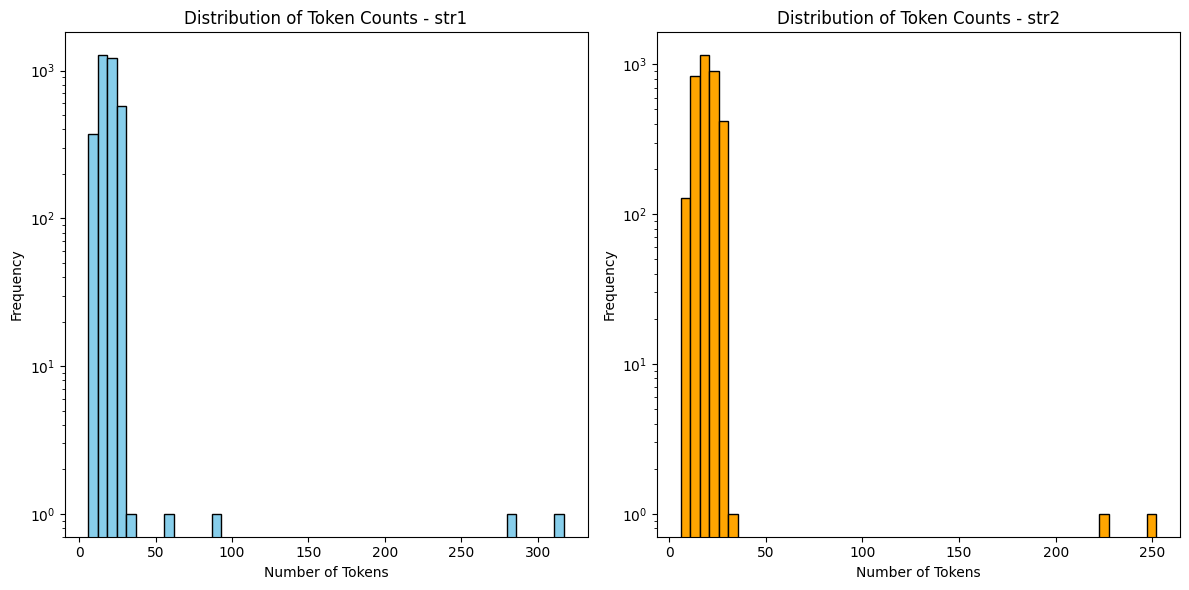

In [ ]:
token_counts_str1 = [len(rev.split()) for rev in train_df['#1 String']]
token_counts_str2 = [len(rev.split()) for rev in train_df['#2 String']]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(token_counts_str1, bins=50, color='skyblue', edgecolor='black', log=True)
plt.title('Distribution of Token Counts - str1')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(token_counts_str2, bins=50, color='orange', edgecolor='black', log=True)
plt.title('Distribution of Token Counts - str2')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

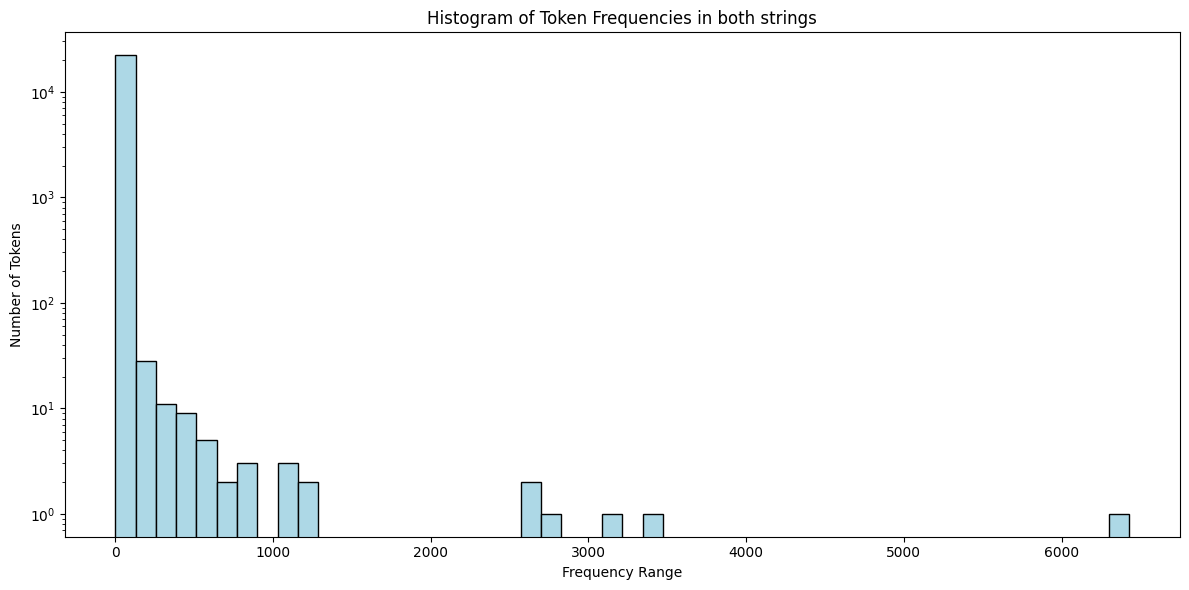

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

all_tokens = [token for rev in train_df['#1 String'] + train_df['#2 String'] for token in rev.split()]

token_counts = Counter(all_tokens)

token_counts_df = pd.DataFrame(list(token_counts.items()), columns=['Token', 'Frequency'])

token_counts_df = token_counts_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.hist(token_counts_df['Frequency'], bins=50, color='lightblue', edgecolor='black', log=True)
plt.title('Histogram of Token Frequencies in both strings')
plt.xlabel('Frequency Range')
plt.ylabel('Number of Tokens')

plt.tight_layout()
plt.show()


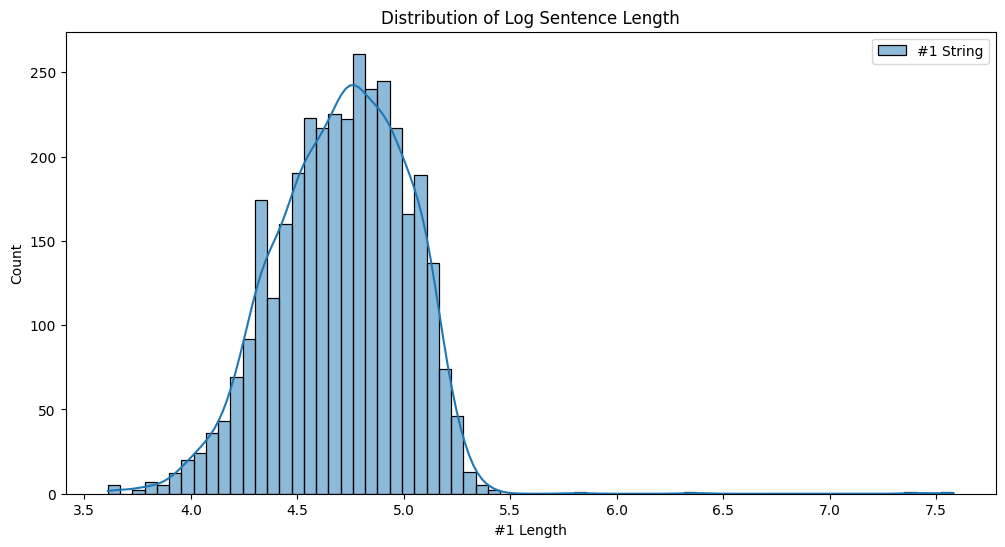

In [ ]:
train_df['#1 Length'] = train_df['#1 String'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x=np.log(train_df['#1 Length']), kde=True, label='#1 String')
plt.title('Distribution of Log Sentence Length')
plt.legend()
plt.show()

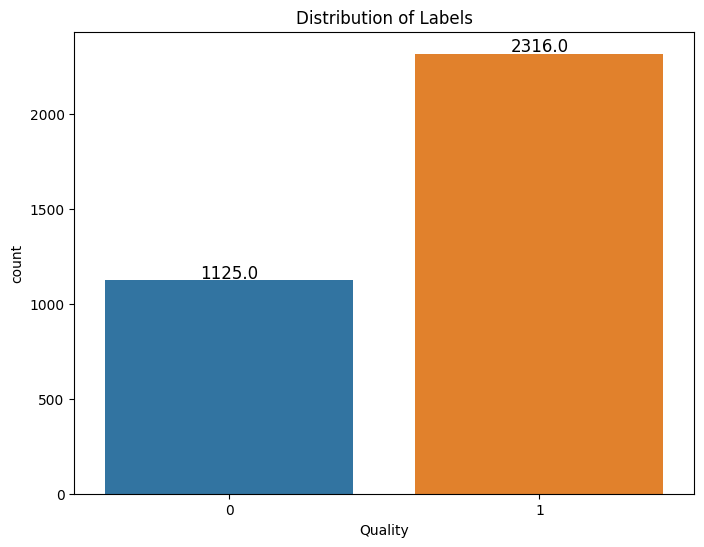

In [ ]:
# Tạo biểu đồ
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Quality')

# Hiển thị số lượng trên đỉnh từng cột
counts = []
for p in ax.patches:
    count = p.get_height()
    counts.append(count)
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Labels')
plt.show()

In [ ]:
dif = 2316 - 1125
dif

1191

### Data augmentation

In [ ]:
def augment_with_wordnet(sentence):
    tokens = sentence.split()
    augmented_tokens = []

    for token in tokens:
        synsets = wordnet.synsets(token)
        if synsets:
            random_synset = random.choice(synsets)
            random_lemma = random.choice(random_synset.lemmas()).name()
            augmented_tokens.append(random_lemma)
        else:
            augmented_tokens.append(token)

    return ' '.join(augmented_tokens)

zero_label_rows = train_df[train_df['Quality'] == 0]

num_samples = dif

augmented_data = []

for index, row in zero_label_rows.iterrows():
    if len(augmented_data) >= num_samples:
        break
    augmented_row = row.copy()
    augmented_row['#1 String'] = augment_with_wordnet(row['#1 String'])
    augmented_row['#2 String'] = augment_with_wordnet(row['#2 String'])
    augmented_data.append(augmented_row)

augmented_df = pd.DataFrame(augmented_data)

train_df = pd.concat([train_df, augmented_df], ignore_index=True)

train_df = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
for i in range(min(5, len(augmented_data))):
    original_sentence = zero_label_rows.iloc[i]['#1 String']
    augmented_sentence = augmented_data[i]['#1 String']

    print(f"Original: {original_sentence}")
    print(f"Augmented: {augmented_sentence}")
    print("\n")

Original: Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion.
Augmented: Yucaipa have Dominick's before sell the Sir_Ernst_Boris_Chain to Safeway in 1998 for $2.5 billion.


Original: Around 0335 GMT, Tab shares were up 19 cents, or 4.4%, at A$4.56, having earlier set a record high of A$4.57.
Augmented: around 0335 GMT, tab share live up nineteen cents, operating_room 4.4%, at A$4.56, have sooner set A record high of A$4.57.


Original: The Nasdaq had a weekly gain of 17.27, or 1.2 percent, closing at 1,520.15 on Friday.
Augmented: The NASDAQ have adenine hebdomadally derive of 17.27, Beaver_State 1.2 percent, closing At 1,520.15 on Friday.


Original: That compared with $35.18 million, or 24 cents per share, in the year-ago period.
Augmented: That equate with $35.18 million, OR twenty-four centime per share, in the year-ago period.


Original: Gyorgy Heizler, head of the local disaster unit, said the coach was carrying 38 passengers.
Augmented: Gyorg

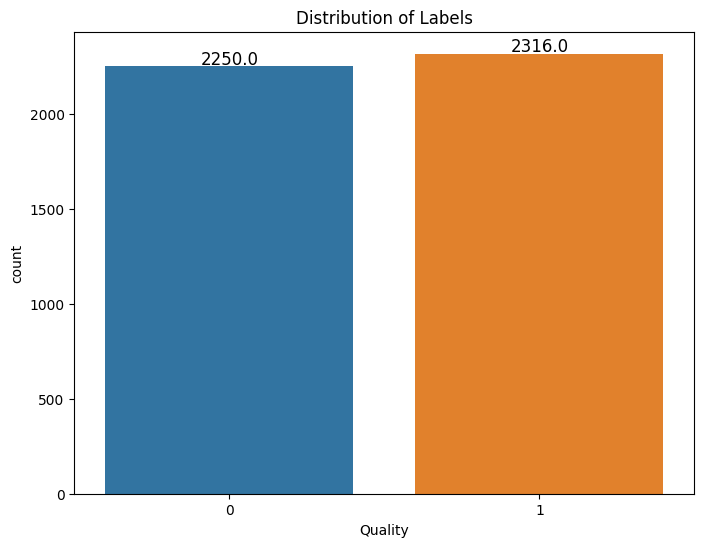

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Quality')

counts = []
for p in ax.patches:
    count = p.get_height()
    counts.append(count)
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Labels')
plt.show()

### Clean data

In [ ]:
#replacing symbols and short forms
def clean(text):
    text=text.lower()

    # unit
    text = text.replace('=', ' is equal to ')
    text = text.replace('%', ' percent ')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('+', ' plus ')
    text = text.replace('/', ' or ')
    text = text.replace('-', ' ')
    text = text.replace('[math]', '')
    text = re.sub(r"(\d+)kgs ", lambda m: m.group(1) + ' kg ', text)
    text = re.sub(r"(\d+)kg ", lambda m: m.group(1) + ' kg ', text)
    text = re.sub(r"(\d+)k ", lambda m: m.group(1) + '000 ', text)
    text = re.sub(r"\$(\d+)", lambda m: m.group(1) + ' dollar ', text)
    text = re.sub(r"(\d+)\$", lambda m: m.group(1) + ' dollar ', text)

    #acronyms
    replacements_dict = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",

    }

    # Apply replacements
    pattern = re.compile(r'\b(' + '|'.join(replacements_dict.keys()) + r')\b')
    text = pattern.sub(lambda x: replacements_dict[x.group()], text)

    # punctuation
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"-", " - ", text)
    text = re.sub(r"/", " / ", text)
    text = re.sub(r"\\", " \ ", text)
    text = re.sub(r"=", " = ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r":", " : ", text)

    text = re.sub(r",", " , ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\"", " \" ", text)
    text = re.sub(r"&", " & ", text)
    text = re.sub(r"\|", " | ", text)
    text = re.sub(r";", " ; ", text)
    text = re.sub(r"\(", " ( ", text)
    text = re.sub(r"\)", " ( ", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # spelling correction
    text = re.sub(r"ph\.d", "phd", text)
    text = re.sub(r"PhD", "phd", text)
    text = re.sub(r"pokemons", "pokemon", text)
    text = re.sub(r"pokémon", "pokemon", text)
    text = re.sub(r"pokemon go ", "pokemon-go ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" e mail ", " email ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" 9 11 ", " 911 ", text)
    text = re.sub(r" j k ", " jk ", text)
    text = re.sub(r" fb ", " facebook ", text)
    text = re.sub(r"facebooks", " facebook ", text)
    text = re.sub(r"facebooking", " facebook ", text)
    text = re.sub(r"insidefacebook", "inside facebook", text)
    text = re.sub(r"donald trump", "trump", text)
    text = re.sub(r"the big bang", "big-bang", text)
    text = re.sub(r"the european union", "eu", text)
    text = re.sub(r" usa ", " america ", text)
    text = re.sub(r" us ", " america ", text)
    text = re.sub(r" u s ", " america ", text)
    text = re.sub(r" U\.S\. ", " america ", text)
    text = re.sub(r" US ", " america ", text)
    text = re.sub(r" American ", " america ", text)
    text = re.sub(r" America ", " america ", text)
    text = re.sub(r" quaro ", " quora ", text)
    text = re.sub(r" mbp ", " macbook-pro ", text)
    text = re.sub(r" mac ", " macbook ", text)
    text = re.sub(r"macbook pro", "macbook-pro", text)
    text = re.sub(r"macbook-pros", "macbook-pro", text)

    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text)
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE)
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE)
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)

    text = ' '.join(text.split())
    return text


In [ ]:
train_df['new_str1'] = train_df['#1 String'].apply(clean)
train_df['new_str2'] = train_df['#2 String'].apply(clean)

val_df['new_str1'] = val_df['#1 String'].apply(clean)
val_df['new_str2'] = val_df['#2 String'].apply(clean)

### Example clean output

In [ ]:
example=np.random.randint(len(train_df))
print(train_df['#1 String'][example])
print(train_df['new_str1'][example])

The trial, featuring 125 witnesses, could continue until the start of 2004.
the trial featuring 125 witnesses could continue until the start of 2004


### Text to sequence

In [ ]:
token_matrix=[]
for sentence1, sentence2 in zip(train_df['new_str1'], train_df['new_str2']):
    token_matrix.append(nltk.word_tokenize(sentence1));
    token_matrix.append(nltk.word_tokenize(sentence2));

In [ ]:
for sentence in token_matrix[:5]:
    print(sentence,"\n")

['farmland', 'foods', 'president', 'george', 'richter', 'said', 'with', 'smithfield', 's', 'support', 'and', 'leadership', 'farmland', 'foods', 'will', 'succeed', 'and', 'continue', 'to', 'sustain', 'the', 'midwestern', 'communities', 'which', 'depend', 'on', 'it'] 

['with', 'smithfields', 'leadership', 'farmland', 'foods', 'will', 'succeed', 'and', 'continue', 'to', 'sustain', 'the', 'midwestern', 'communities', 'which', 'depend', 'on', 'it'] 

['atomicnumber56', 'partakein', 'be', 'up', '059', 'percent', 'at', 'clxx', 'centime', 'in', 'early', 'afternoon', 'trading', 'slightly', 'outpace', 'london', 's', 'ftse', 'century', 'indicator', 'which', 'cost', 'up', '028', 'percent'] 

['barium', 'share', 'close', 'down', '089', 'percent', 'astatine', '167', '1', 'or', '2', 'pence', 'slenderly', 'low', 'pitched', 'than', 'london', 's', 'ftse', '100', 'power', 'which', 'wa', 'down', '028', 'percent'] 

['the', 'victim', 'who', 'was', 'also', 'not', 'identified', 'was', 'taken', 'to', 'kings'

In [ ]:
print(len(token_matrix))

9132


### FastText embedding

In [ ]:
vector_size = 100
window = 5
min_count = 1
epochs = 50
sg = 1
min_alpha = 0.00001

In [ ]:
from gensim.models import FastText

ft_model = FastText(sentences=token_matrix, vector_size=vector_size, window=window, min_count=min_count, min_alpha = min_alpha, sg=sg)
ft_model.train(token_matrix, epochs=epochs, total_examples=len(token_matrix))

(7267410, 8929000)

In [ ]:
ft_vocab = ft_model.wv.index_to_key
print("The total number of words are : ",len(ft_vocab))

The total number of words are :  15807


In [ ]:
print('close to \'man\'')
for word, prob in ft_model.wv.most_similar('man'):
    print(f"{word}: {prob:.3f}")

# In ra theo hàng dọc cho 'dad'
print('\nclose to \'woman\'')
for word, prob in ft_model.wv.most_similar('woman'):
    print(f"{word}: {prob:.3f}")

close to 'man'
mankiw: 0.672
mancha: 0.659
manzon: 0.640
babylon: 0.633
mankind: 0.613
neiman: 0.611
rahman: 0.607
chapman: 0.603
gunman: 0.600
mann: 0.590

close to 'woman'
womans: 0.877
womanhood: 0.811
gaywoman: 0.802
charwoman: 0.757
jurywoman: 0.754
cleaningwoman: 0.719
womb: 0.711
marriedwoman: 0.622
chairwoman: 0.619
hoy: 0.617


### Prepare data for embedding layer in CNN

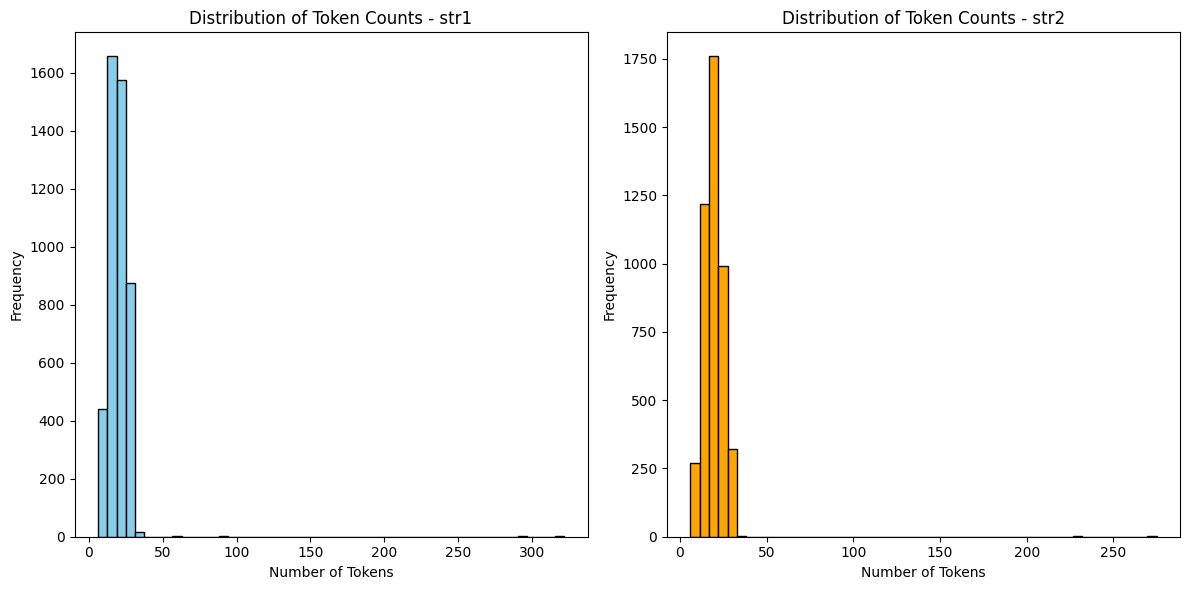

In [ ]:
token_counts_str1 = [len(rev.split()) for rev in train_df['new_str1']]
token_counts_str2 = [len(rev.split()) for rev in train_df['new_str2']]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(token_counts_str1, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Counts - str1')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(token_counts_str2, bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Token Counts - str2')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Số lượng từ trong câu tập trung từ 0-40, do đó đặt maxlen của sequence là 40 thay vì giá trị lớn nhất là 205 giúp mô hình đỡ bị nhiễu và tiết kiệm được nhiều tài nguyên.

In [ ]:
maxlen = 40

In [ ]:
# Tokenizing the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['new_str1'].values + train_df['new_str2'].values)
train_vocab=tokenizer.word_index

In [ ]:
len(train_vocab)

18893

In [ ]:
#preparing sequenced data
train_sequences_1 = tokenizer.texts_to_sequences(train_df['new_str1'].values)
train_sequences_2 = tokenizer.texts_to_sequences(train_df['new_str2'].values)

val_sequences_1 = tokenizer.texts_to_sequences(val_df['new_str1'].values)
val_sequences_2 = tokenizer.texts_to_sequences(val_df['new_str2'].values)

In [ ]:
for seq in train_sequences_1[:5]:
    print(seq,"\n")

[93, 15, 1222, 64, 115, 139, 2, 517, 1, 812, 1955, 4430, 9] 

[2571, 1, 74, 4431, 37, 4432, 38, 2, 194, 82, 1956, 2935, 1223, 664, 1004, 1005, 1555] 

[1, 309, 2, 250, 36, 2572, 31, 58, 7088, 20, 446, 593, 2, 574, 20, 1, 532, 5, 6, 1305, 3281, 5, 188, 260] 

[1, 687, 142, 155, 7, 143, 60, 261, 14, 38, 7089, 56, 22, 4433, 17, 16] 

[3816, 3, 2573, 2936, 88, 6, 5870, 434, 16, 50, 1224, 239, 210, 2574, 533, 688, 2937, 3, 2575, 1306, 239, 210] 



In [ ]:
train_data_1 = pad_sequences(train_sequences_1, maxlen=maxlen,  padding='post')
train_data_2 = pad_sequences(train_sequences_2, maxlen=maxlen,  padding='post')

val_data_1 = pad_sequences(val_sequences_1, maxlen=maxlen,  padding='post')
val_data_2 = pad_sequences(val_sequences_2, maxlen=maxlen,  padding='post')

In [ ]:
train_data_1.shape

(4566, 40)

In [ ]:
# Prepare the target labels
train_labels = train_df['Quality'].values
val_labels = val_df['Quality'].values

### Create embedding matrix

In [ ]:
vocab_size = len(train_vocab) + 1
embed_dim = vector_size

In [ ]:
# match index of word in sentence to embedding matrix
embedding_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tokenizer.word_index.items():
  embed_vector=ft_model.wv.get_vector(word)
  if embed_vector is not None:
    embedding_matrix[i]=embed_vector

In [ ]:
embedding_matrix.shape

(18894, 100)

<center>

# **2. Model**

</center>

In [ ]:
# Reshape the labels to match the model's output shape
train_labels_reshaped = np.expand_dims(train_labels, axis=-1)
val_labels_reshaped = np.expand_dims(val_labels, axis=-1)

class_weight = {0: 2, 1: 1}

input_shape = (maxlen,)

In [ ]:
# sentence 1
string_1 = Input(shape=(maxlen,))
embedding_layer_1 = Embedding(input_dim=vocab_size, output_dim=embed_dim,
                            input_length=maxlen, embeddings_initializer=Constant(embedding_matrix), trainable=True)
embed_string_1 = embedding_layer_1(string_1)

conv1d_layer_str1_1 = Conv1D(32, 5, activation='relu')(embed_string_1)
pooling_str1_1 = MaxPooling1D(pool_size=2)(conv1d_layer_str1_1)

conv1d_layer_str1_2 = Conv1D(32, 5, activation='relu')(pooling_str1_1)
pooling_str1_2 = MaxPooling1D(pool_size=2)(conv1d_layer_str1_2)
new_embed_1 = pooling_str1_2

Lstm_1 = LSTM(units=32, return_sequences=True)
block_lstm_1 = Lstm_1(new_embed_1)

# sentence 2
string_2 = Input(shape=(maxlen,))
embedding_layer2 = Embedding(input_dim=vocab_size, output_dim=embed_dim,
                            input_length=maxlen, embeddings_initializer=Constant(embedding_matrix), trainable=True)
embed_string_1 = embedding_layer2(string_2)

conv1d_layer_str2_1 = Conv1D(32, 5, activation='relu')(embed_string_1)
pooling_str2_1 = MaxPooling1D(pool_size=2)(conv1d_layer_str2_1)

conv1d_layer_str2_2 = Conv1D(32, 5, activation='relu')(pooling_str2_1)
pooling_str2_2 = MaxPooling1D(pool_size=2)(conv1d_layer_str2_2)
new_embed_2 = pooling_str2_2

Lstm_2 = LSTM(units=32, return_sequences=True)
block_lstm_2 = Lstm_2(new_embed_2)

merged_output = Concatenate()([block_lstm_1, block_lstm_2])

# Add the output layers
dense_1 = Dense(32, activation='relu')(merged_output)
dropout_1 = Dropout(0.1)(dense_1)

bn = BatchNormalization()(dropout_1)

dense_2 = Dense(32, activation='relu')(bn)
dropout_2 = Dropout(0.1)(dense_2)

# Flatten
flattened = Flatten()(dropout_2)

# sigmoid
output = Dense(1, activation='sigmoid')(flattened)

model = Model(inputs=[string_1, string_2], outputs=output)

# Compile the model

learning_rate = 0.0003

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 40, 100)      1889400     ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 40, 100)      1889400     ['input_4[0][0]']                
                                                                                            

In [ ]:
seed=42
batch_size=2048
epochs=50
threshold=0.5

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)

history=model.fit(
        [train_data_1, train_data_2], train_labels_reshaped,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=([val_data_1, val_data_2], val_labels_reshaped),
         callbacks=[checkpointer],
         class_weight=class_weight,
         shuffle=True
         )

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 1.1774 - accuracy: 0.5094
Epoch 1: val_loss improved from inf to 0.72271, saving model to model.weights.best.hdf5
3/3 [==============================] - 15s 3s/step - loss: 1.1774 - accuracy: 0.5094 - val_loss: 0.7227 - val_accuracy: 0.3172
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 1.0436 - accuracy: 0.5239
Epoch 2: val_loss did not improve from 0.72271
3/3 [==============================] - 3s 851ms/step - loss: 1.0436 - accuracy: 0.5239 - val_loss: 0.7293 - val_accuracy: 0.3130
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.9800 - accuracy: 0.5440
Epoch 3: val_loss did not improve from 0.72271
3/3 [==============================] - 3s 1s/step - loss: 0.9800 - accuracy: 0.5440 - val_loss: 0.7325 - val_accuracy: 0.3088
Epoch 4/50
3/3 [==============================] - ETA: 0s - loss: 0.9517 - accuracy: 0.5530
Epoch 4: val_loss did not improve from 0.72271
3/3 [================

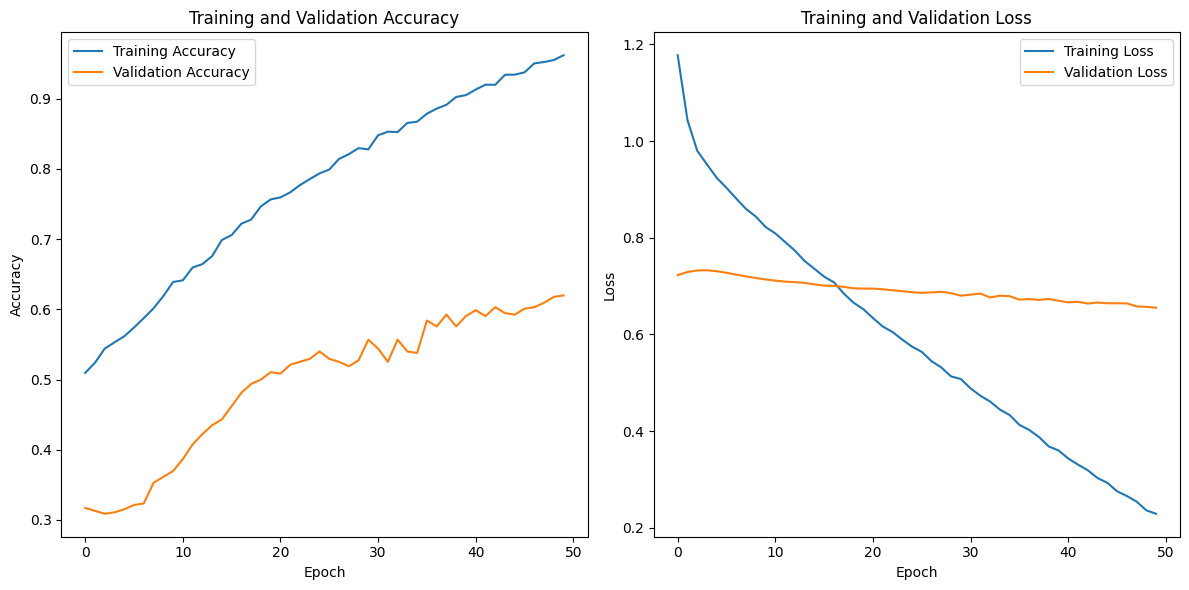

In [ ]:
# Lấy accuracy và loss từ quá trình đào tạo
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Vẽ biểu đồ accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Vẽ biểu đồ loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

<center>

# **3. Evaluation**

</center>

## Result in validation data



In [ ]:
val_pred = model.predict([val_data_1, val_data_2])
val_pred_binary=(val_pred > threshold).astype(int)

15/15 [==============================] - 1s 7ms/step


In [ ]:
print(classification_report(val_labels_reshaped, val_pred_binary, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.40      0.50      0.45       146
     Class 1       0.75      0.67      0.71       330

    accuracy                           0.62       476
   macro avg       0.58      0.59      0.58       476
weighted avg       0.65      0.62      0.63       476



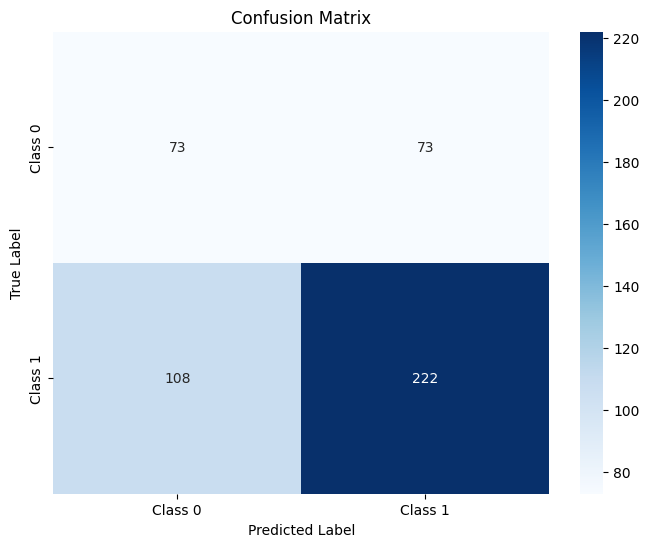

In [ ]:
cm = confusion_matrix(val_labels_reshaped, val_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

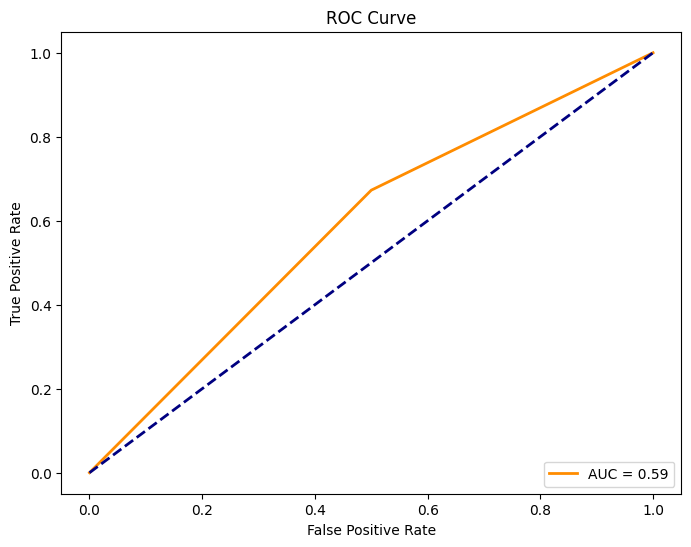

In [ ]:
fpr, tpr, thresholds = roc_curve(val_labels_reshaped, val_pred_binary)
roc_auc = roc_auc_score(val_labels_reshaped, val_pred_binary)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Result in test data

In [ ]:
TEST_DATA_PATH='/content/drive/MyDrive/Colab Notebooks/MSRP/test.tsv'

In [ ]:
test_df = pd.read_csv(TEST_DATA_PATH, delimiter='\t', error_bad_lines=False)
test_df.dropna(inplace=True)

Skipping line 34: expected 5 fields, saw 6
Skipping line 121: expected 5 fields, saw 6
Skipping line 211: expected 5 fields, saw 6
Skipping line 263: expected 5 fields, saw 6
Skipping line 345: expected 5 fields, saw 6
Skipping line 696: expected 5 fields, saw 6
Skipping line 733: expected 5 fields, saw 6
Skipping line 847: expected 5 fields, saw 6
Skipping line 1392: expected 5 fields, saw 6
Skipping line 1467: expected 5 fields, saw 6
Skipping line 1551: expected 5 fields, saw 6



In [ ]:
test_df['new_str1'] = test_df['#1 String'].apply(clean)
test_df['new_str2'] = test_df['#2 String'].apply(clean)

In [ ]:
test_sequences_1 = tokenizer.texts_to_sequences(test_df['new_str1'].values)
test_sequences_2 = tokenizer.texts_to_sequences(test_df['new_str2'].values)

In [ ]:
test_data_1 = pad_sequences(test_sequences_1, maxlen=maxlen,  padding='post')
test_data_2 = pad_sequences(test_sequences_2, maxlen=maxlen,  padding='post')

test_labels = test_df['Quality'].values
test_labels_reshaped = np.expand_dims(test_labels, axis=-1)

In [ ]:
#loading best model
model.load_weights('model.weights.best.hdf5')

### Predict

In [ ]:
pred=model.predict([test_data_1 , test_data_2])

51/51 [==============================] - 0s 7ms/step


In [ ]:
pred_binary=(pred > threshold).astype(int)

In [ ]:
pred_binary.shape

(1630, 1)

In [ ]:
report = classification_report(test_labels_reshaped, pred_binary, target_names=['Class 0', 'Class 1'])
print(report)


              precision    recall  f1-score   support

     Class 0       0.42      0.53      0.47       548
     Class 1       0.73      0.63      0.68      1082

    accuracy                           0.60      1630
   macro avg       0.57      0.58      0.57      1630
weighted avg       0.62      0.60      0.61      1630



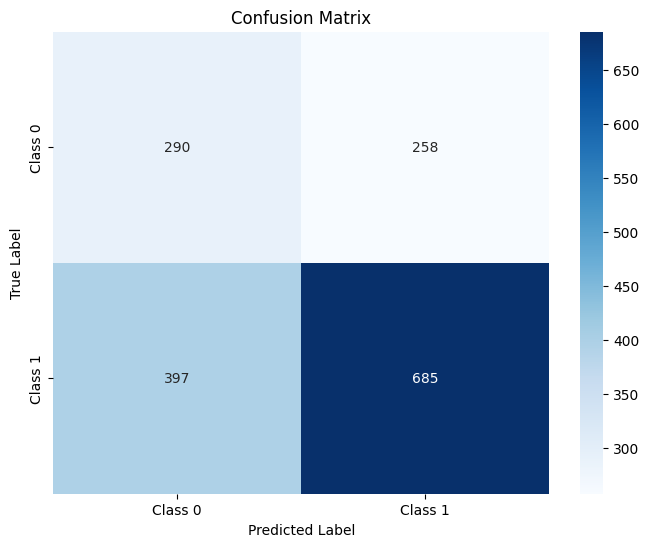

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận confusion
cm = confusion_matrix(test_labels_reshaped, pred_binary)

# Vẽ ma trận confusion bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


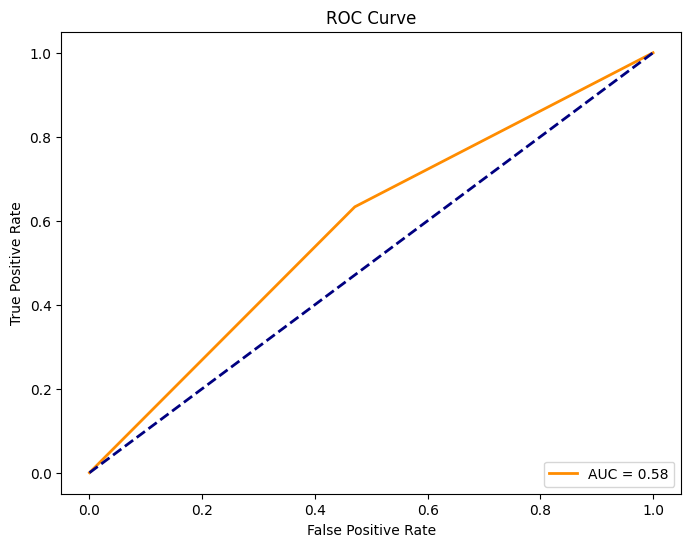

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Tính ROC curve và AUC
fpr, tpr, thresholds = roc_curve(test_labels_reshaped, pred_binary)
roc_auc = roc_auc_score(test_labels_reshaped, pred_binary)

# Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
